# 測定データのCSVファイルを読み込み、補正後の記録値を得る

ライブラリの取り込み

In [25]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import codecs

# グラフのデフォルトフォントを指定
plt.rcParams['font.size'] = 18
# データフレームの桁数設定
pd.options.display.precision = 3

CSVファイルのヘッダ部分を読み飛ばすためヘッダの行数を取得（ファイルはshift-jis）<br>
<font color='red'>CSVファイルのフッタ部（文字情報あり）はあらかじめ消去しておくこと！</font>

In [147]:
csv_path_1 = './0713a/'
file_name ='127'
csv_path = csv_path_1 + file_name    # 後で DF を名前を変えて保存するため'.csv'を含めない

fin = codecs.open(csv_path + '.csv', "r", "shift_jis")
data = fin.readline()
arry = data.split(',')
if not('BeginHeader' in arry[0]):
    print('測定データではありません。')
else:
    skip_length = int(arry[1])
    print(data, end='')
    for i in range(skip_length + 3):
        print(fin.readline(), end='')
fin.close()

#BeginHeader,71,,,,,,,
#FormatType,NR-600\NORMAL,,,,,,,
#FormatVersion,R4.00.00,,,,,,,
タイトル,,,,,,,,
ユニット番号,UNIT0,UNIT1,UNIT2,MASTER,,,,
ユニット種別,NR-U60,(1)HV,(2)HV,NR-600,,,,
,,,,,,,,
計測モード,ノーマルモード,,,,,,,
収集開始日時,2022/7/13 11:13,0,,,,,,
サンプリング周期,10ms,,,,,,,
データ数,500,,,,,,,
保存オプション,標準,,,,,,,
,,,,,,,,
ユニット種別共通,,,,,,,,
ユニット種別名,NR-HV04共通,,,,,,,
実サンプリング周期,10ms,,,,,,,
計測機能設定,***,,,,,,,
AD積分時間,***,,,,,,,
ｱﾝﾁｴｲﾘｱｼﾝｸﾞﾌｨﾙﾀ,***,,,,,,,
断線検出値,***,,,,,,,
デジタルフィルタ,ON,,,,,,,
その他,,,,,,,,
デジタルフィルタ,***,,,,,,,
停止予測,***,,,,,,,
,,,,,,,,
トリガ条件,,,,,,,,
マニュアルトリガ,OFF,,,,,,,
外部トリガ入力,OFF,,,,,,,
エッジトリガ,OFF,,,,,,,
エッジトリガ対象ユニット,なし,,,,,,,
プリトリガ/ポストトリガ,***,,,,,,,
ポイント数,***,,,,,,,
,,,,,,,,
判定/アラーム条件,,,,,,,,
出力モード,保持する,,,,,,,
バーンアウトアラーム,***,,,,,,,
断線アラーム,***,,,,,,,
,,,,,,,,
チャンネル条件,,,,,,,,
チャンネル番号,,(1)HV-CH01,(1)HV-CH02,(1)HV-CH03,(1)HV-CH04,(2)HV-CH01,(2)HV-CH02,(2)HV-CH03
波形名,,Channel01,Channel02,Channel03,Channel04,Channel01,Channel02,Channel03
入力レンジ,,±10V,±10V,±10V,±10V,±10V,±10V,±10V
単位,,mm,mm,mm,mm,mm,mm,mm
計測機能,,,,,

CSVファイルの取り込み ヘッダ部スキップ、読み込み列指定、ヘッダ変更
※体験版で実際は動かないので、低電圧と高電圧を読み込む

In [148]:
header = ['R_d', 'R_h', 'T_d', 'T_h' ,'Guide', 'RoadL', 'RoadR']
df = pd.read_csv(csv_path + '.csv', skiprows=skip_length, usecols=[2,3,4,5,6,7,8], names=header, header=None, encoding='shift_jis')

df

,R_d,R_h,T_d,T_h,Guide,RoadL,RoadR
0,1.838,1.443,0.209,-1.098,0.681,0.444,-0.459
1,1.839,1.443,0.209,-1.098,0.687,0.450,-0.468
2,1.838,1.443,0.198,-1.097,0.690,0.450,-0.471
3,1.839,1.453,0.198,-1.108,0.684,0.456,-0.471
4,1.838,1.453,0.198,-1.139,0.684,0.459,-0.471
...,...,...,...,...,...,...,...
495,1.818,1.544,0.189,-1.099,0.669,0.498,-0.492
496,1.818,1.543,0.189,-1.098,0.666,0.498,-0.495
497,1.818,1.543,0.189,-1.098,0.666,0.498,-0.495
498,1.827,1.543,0.189,-1.097,0.669,0.498,-0.495


In [149]:
df.describe()

,R_d,R_h,T_d,T_h,Guide,RoadL,RoadR
count,500.000,500.000,500.000,500.000,500.000,500.000,500.000
mean,1.834,1.517,0.202,-1.116,0.679,0.491,-0.485
std,0.008,0.033,0.010,0.026,0.010,0.014,0.010
min,1.817,1.442,0.188,-1.199,0.663,0.444,-0.498
25%,1.827,1.493,0.198,-1.138,0.672,0.489,-0.492
50%,1.838,1.533,0.198,-1.098,0.675,0.495,-0.489
75%,1.839,1.543,0.209,-1.098,0.684,0.501,-0.480
max,1.858,1.544,0.229,-1.097,0.705,0.513,-0.459


Text(0.5, 0, 'difference [mm]')

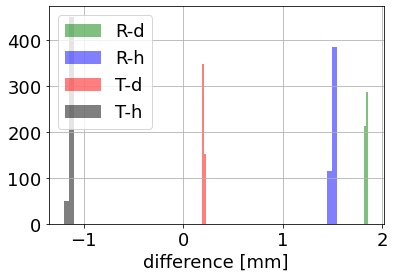

In [150]:
bins = 2
xlim = .1

df["R_d"].hist(bins=bins, color="green", label = 'R-d', alpha=0.5)
df["R_h"].hist(bins=bins, color="blue", label = 'R-h', alpha=0.5)
df["T_d"].hist(bins=bins, color="red", label = 'T-d', alpha=0.5)
# df["S_h"].hist(bins=bins, color="red", label = 'S-h', alpha=0.5)
df["T_h"].hist(bins=bins, color="black", label = 'T-h', alpha=0.5)

plt.legend()
plt.xlabel("difference [mm]")
#plt.xlim(-xlim, xlim)

Text(0, 0.5, 'difference [mm]')

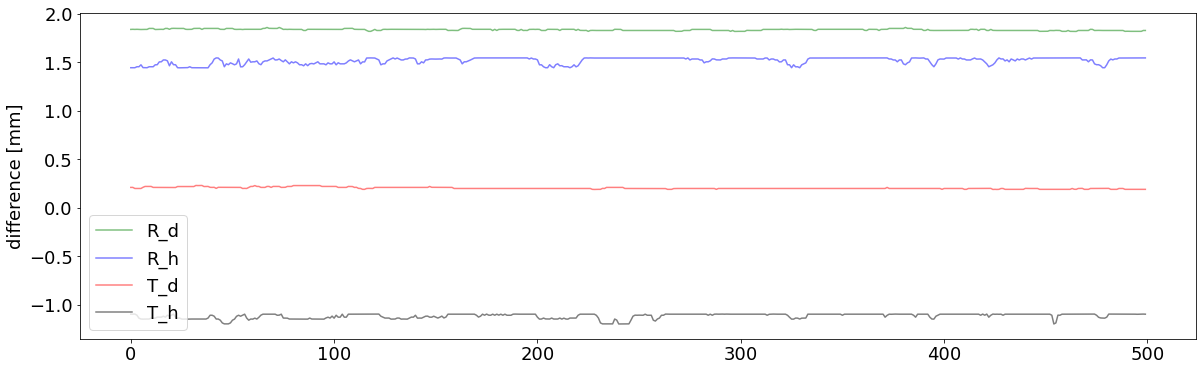

In [151]:
ylim = 1

df["R_d"].plot(style="g-", label = 'R_d', alpha=0.5, figsize=(20, 6))
df["R_h"].plot(style="b-", label = 'R_h', alpha=0.5)
# df["S_h"].plot(style="r.", label = 'S_h', alpha=0.5)
df["T_d"].plot(style="r-", label = 'T_d', alpha=0.5)
df["T_h"].plot(style="k-", label = 'T_h', alpha=0.5)

plt.legend()
plt.ylabel("difference [mm]")
#plt.ylim(-ylim, ylim)

Text(0.5, 0, 'defference [mm]')

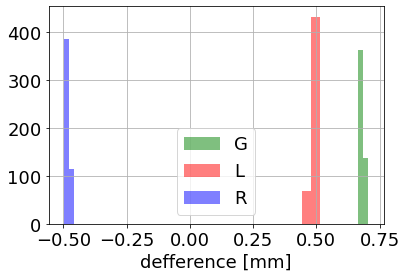

In [152]:
bins = 2
xlim = .1

df["Guide"].hist(bins=bins, color="green", label = 'G', alpha=0.5)
df["RoadL"].hist(bins=bins, color="red", label = 'L', alpha=0.5)
df["RoadR"].hist(bins=bins, color="blue", label = 'R', alpha=0.5)

plt.legend()
plt.xlabel("defference [mm]")
#plt.xlim(-xlim, xlim)

Text(0, 0.5, 'difference [mm]')

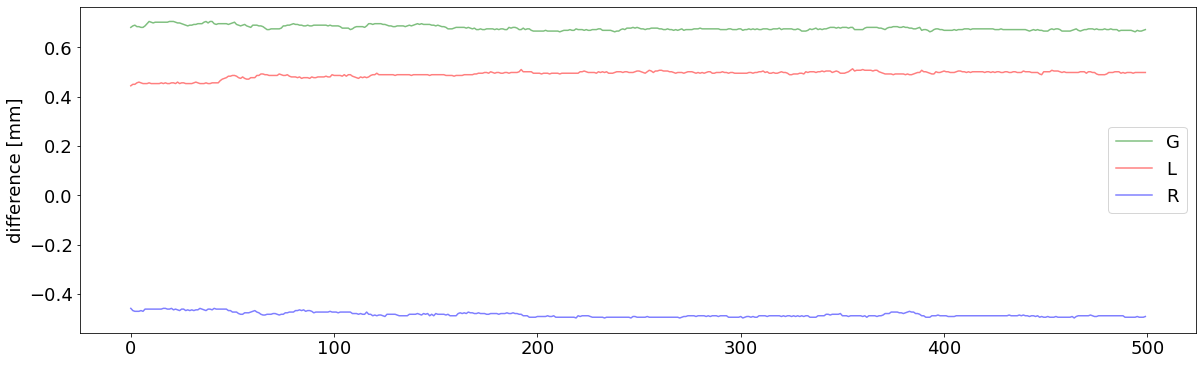

In [153]:
df["Guide"].plot(style="g-", label = 'G', alpha=0.5, figsize=(20,6))
df["RoadL"].plot(style="r-", label = 'L', alpha=0.5)
df["RoadR"].plot(style="b-", label = 'R', alpha=0.5)

ylim = 1
plt.legend()
plt.ylabel("difference [mm]")
# plt.ylim(-ylim, ylim)
# plt.xlim(0, 200)

### 3σを基準に外れ値をNaNで埋める関数

In [154]:
def outlier_3s(df):
    
    for i in range(len(df.columns)):
        # 列の抽出
        col = df.iloc[:,i]
        # 平均と標準偏差
        average = np.mean(col)
        sd = np.std(col)
        
        # 外れ値の基準点
        outlier_min = average - sd*3
        outlier_max = average + sd*3
        
        # 範囲から外れている値をNaNに
        col[col < outlier_min] = None
        col[col > outlier_max] = None
        
    return df

DF の外れ値をNaNで埋める

In [155]:
df3 = outlier_3s(df).copy()    # pandasのSettingWithCopyWarningを避けるため.copy()を追加
df3

,R_d,R_h,T_d,T_h,Guide,RoadL,RoadR
0,1.838,1.443,0.209,-1.098,0.681,NaN,-0.459
1,1.839,1.443,0.209,-1.098,0.687,0.450,-0.468
2,1.838,1.443,0.198,-1.097,0.690,0.450,-0.471
3,1.839,1.453,0.198,-1.108,0.684,0.456,-0.471
4,1.838,1.453,0.198,-1.139,0.684,0.459,-0.471
...,...,...,...,...,...,...,...
495,1.818,1.544,0.189,-1.099,0.669,0.498,-0.492
496,1.818,1.543,0.189,-1.098,0.666,0.498,-0.495
497,1.818,1.543,0.189,-1.098,0.666,0.498,-0.495
498,1.827,1.543,0.189,-1.097,0.669,0.498,-0.495


NaNを含む行を削除

In [156]:
df3.dropna(how='any', axis=0, inplace=True)
df3

,R_d,R_h,T_d,T_h,Guide,RoadL,RoadR
1,1.839,1.443,0.209,-1.098,0.687,0.450,-0.468
2,1.838,1.443,0.198,-1.097,0.690,0.450,-0.471
3,1.839,1.453,0.198,-1.108,0.684,0.456,-0.471
4,1.838,1.453,0.198,-1.139,0.684,0.459,-0.471
5,1.837,1.473,0.198,-1.148,0.681,0.456,-0.468
...,...,...,...,...,...,...,...
495,1.818,1.544,0.189,-1.099,0.669,0.498,-0.492
496,1.818,1.543,0.189,-1.098,0.666,0.498,-0.495
497,1.818,1.543,0.189,-1.098,0.666,0.498,-0.495
498,1.827,1.543,0.189,-1.097,0.669,0.498,-0.495


In [157]:
df3.describe()

,R_d,R_h,T_d,T_h,Guide,RoadL,RoadR
count,483.000,483.000,483.000,483.000,483.000,483.000,483.000
mean,1.835,1.517,0.202,-1.114,0.679,0.491,-0.485
std,0.008,0.033,0.010,0.021,0.010,0.014,0.010
min,1.817,1.442,0.188,-1.188,0.663,0.450,-0.498
25%,1.827,1.493,0.198,-1.137,0.672,0.489,-0.492
50%,1.838,1.533,0.198,-1.098,0.675,0.495,-0.489
75%,1.839,1.543,0.209,-1.098,0.684,0.499,-0.480
max,1.858,1.544,0.229,-1.097,0.705,0.513,-0.459


Text(0, 0.5, 'difference [mm]')

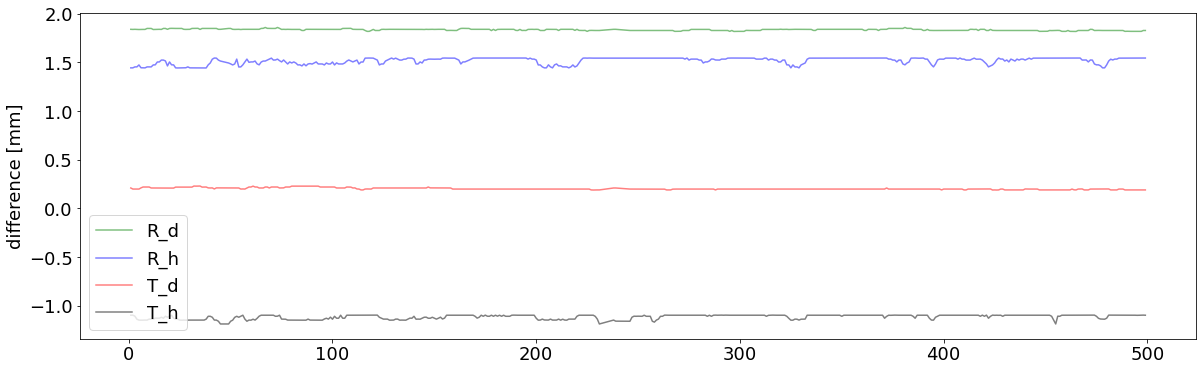

In [158]:
ylim = 1

df3["R_d"].plot(style="g-", label = 'R_d', alpha=0.5, figsize=(20, 6))
df3["R_h"].plot(style="b-", label = 'R_h', alpha=0.5)
# df3["S_h"].plot(style="r.", label = 'S_h', alpha=0.5)
df3["T_d"].plot(style="r-", label = 'T_d', alpha=0.5)
df3["T_h"].plot(style="k-", label = 'T_h', alpha=0.5)

plt.legend()
plt.ylabel("difference [mm]")
#plt.ylim(-ylim, ylim)

DF を名前を変えてcsv保存

In [159]:
df3.to_csv(csv_path + "_data.csv", index=False)

# 手動測定値の入力

In [160]:
# (R_h, R_d, T_h, T_d)

# 基準点の測定値
origin_08 = (1, 0, 0, 0)
origin_08H = (2, -4, 2, -2)
origin_13 = (-3, -1, -3, -1)

# 測定ゲージによる測定値　key = file_name

manual_08 = {'1_zeo': (1, 0, 0, 0),
             '1_294': (2, 0, -1, 0),
             '1_293': (-1, -1, 0, -3),
             '1_292': (-1, 2, 4, -1),
             '1_291': (4, -1, 4, 0),
             '1_hazure': (0, 2, 3, -2)
            }

manual_12 = {'000': (1, 0, 0, 0),
             '294': (2, 0, -1, 0),
             '293': (-1, -1, 0, -3),
             '292': (-1, 2, 4, -1),
             '291': (4, -1, 4, 0)
            }

manual_08H = {'1_zero': (2, -4, 2, -2),
              '103': (4, 0, 4, -2),
              '102': (0, 0, 0, -2),
              '101': (2, -2, 3, -1),
              '100': (0, -1, 1, 0),
              '078': (-3, 0, -2, 0),
              '079': (0, 0, 3, 4),
              '080': (1, -2, 3, 0),
              '081': (1, -2, 1, 0),
              '082': (2, 0, 2, 1),
              '083': (0, 0, 2, -1),
              '084': (-1, 3, 0, -1),
              '085': (-3, 0, 0, 0),
              '086': (-1, -2, 1, 0)
             }

manual_13a = {'130-zero': (-3, -1, -3, -1),
              '129': (-3, 0, -3, -2),
              '128': (1, 0, 0, -1),
              '127': (-2, 1, 0, 0)
             }


if csv_path_1 == './0708/':
    origin = origin_08
    manual = manual_08
    
elif csv_path_1 == './0708H/':
    origin = origin_08H
    manual = manual_08H

elif csv_path_1 == './0712/':
    origin = origin_08
    manual = manual_12

elif csv_path_1 == './0713a/':
    origin = origin_13
    manual = manual_13a

In [161]:
# 基準点補正後の手動測定の値
# df3["R_h_man"] = manual[file_name][0] - origin[0]
df3["R_h_man"] = manual[file_name][0] - origin[0]
df3["R_d_man"] = manual[file_name][1] - origin[1]
df3["T_h_man"] = manual[file_name][2] - origin[2]
df3["T_d_man"] = manual[file_name][3] - origin[3]

In [162]:
TRACK_WIDTH = 1700
R_PHASE = (-500, 780)
S_PHASE = (-500, 625)
T_PHASE = (-500, 470)

# RST = [(-500, 780), (-500, 625), (-500, 470)]
GUIDE = (-600, 300)


def linear_trans_x(coor, th):
    x, y = coor[0], coor[1]
    x_dash = x*np.cos(th) - y*np.sin(th)  
    return x_dash
    
def linear_trans_y(coor, th):
    x, y = coor[0], coor[1]
    y_dash = x*np.sin(th) + y*np.cos(th)    
    return y_dash
    
def get_gradient(r_l, r_r, t_w):
    d_h = r_l - r_r
    theta = np.arctan(d_h / t_w)
    return theta
    

In [163]:
# 台車の回転角度
df3["theta"] = get_gradient(df3["RoadL"], df3["RoadR"], TRACK_WIDTH)

# 各測定ポイントの座標変換
df3["x'_R"] = linear_trans_x(R_PHASE, df3["theta"])
# df3["x'_S"] = linear_trans_x(S_PHASE, df3["theta"])
df3["x'_T"] = linear_trans_x(T_PHASE, df3["theta"])

df3["y'_R"] = linear_trans_y(R_PHASE, df3["theta"])
# df3["y'_S"] = linear_trans_y(S_PHASE, df3["theta"])
df3["y'_T"] = linear_trans_y(T_PHASE, df3["theta"])

df3["x'_G"] = linear_trans_x(GUIDE, df3["theta"])
df3["y'_G"] = linear_trans_y(GUIDE, df3["theta"])

# 座標移動量の計算
df3["dx_R"] = df3["x'_R"] - R_PHASE[0]
# df3["dx_S"] = df3["x'_S"] - S_PHASE[0]
df3["dx_T"] = df3["x'_T"] - T_PHASE[0]

df3["dy_R"] = df3["y'_R"] - R_PHASE[1]
# df3["dy_S"] = df3["y'_S"] - S_PHASE[1]
df3["dy_T"] = df3["y'_T"] - T_PHASE[1]

df3["dx_G"] = df3["x'_G"] - GUIDE[0]
# df3["dy_G"] = df3["y'_G"] - GUIDE[1]

# 案内軌条と電車線の水平方向変位（Guide の水平方向変位量でキャンセル）
df3["dx-G_R"] = df3["dx_R"] - df3["dx_G"]
# df3["dx-G_S"] = df3["dx_S"] - df3["dx_G"]
df3["dx-G_T"] = df3["dx_T"] - df3["dx_G"]

# 補正値の計算
df3["corr_R_h"] = df3["dy_R"] - df3["RoadL"]
# df3["corr_S_h"] = df3["dy_S"] - df3["RoadL"]
df3["corr_T_h"] = df3["dy_T"] - df3["RoadL"]

df3["corr_R_d"] = df3["dx-G_R"] - df3["Guide"]
# df3["corr_S_d"] = df3["dx-G_S"] - df3["Guide"]
df3["corr_T_d"] = df3["dx-G_T"] - df3["Guide"]

# 補正後の結果（記録値）
df3["R_h'"] = df3["R_h"] + df3["corr_R_h"]
# df3["S_h'"] = df3["S_h"] + df3["corr_S_h"]
df3["T_h'"] = df3["T_h"] + df3["corr_T_h"]

df3["R_d'"] = df3["R_d"] + df3["corr_R_d"]
# df3["S_d'"] = df3["S_d"] + df3["corr_S_d"]
df3["T_d'"] = df3["T_d"] + df3["corr_T_d"]

# 手動測定との差
df3["diff_R_d"] = df3["R_d'"] - df3["R_d_man"]
df3["diff_R_h"] = df3["R_h'"] - df3["R_h_man"]
df3["diff_T_d"] = df3["T_d'"] - df3["T_d_man"]
df3["diff_T_h"] = df3["T_h'"] - df3["T_h_man"]

pd.options.display.max_columns = 40
df3

,R_d,R_h,T_d,T_h,Guide,RoadL,RoadR,R_h_man,R_d_man,T_h_man,T_d_man,theta,x'_R,x'_T,y'_R,y'_T,x'_G,y'_G,dx_R,dx_T,dy_R,dy_T,dx_G,dx-G_R,dx-G_T,corr_R_h,corr_T_h,corr_R_d,corr_T_d,R_h',T_h',R_d',T_d',diff_R_d,diff_R_h,diff_T_d,diff_T_h
1,1.839,1.443,0.209,-1.098,0.687,0.450,-0.468,1,2,3,1,5.400e-04,-500.421,-500.254,779.730,469.730,-600.162,299.676,-0.421,-0.254,-0.270,-0.270,-0.162,-0.259,-0.092,-0.720,-0.720,-0.946,-0.779,0.723,-1.818,0.893,-0.570,-1.107,-0.277,-1.570,-4.818
2,1.838,1.443,0.198,-1.097,0.690,0.450,-0.471,1,2,3,1,5.418e-04,-500.423,-500.255,779.729,469.729,-600.162,299.675,-0.423,-0.255,-0.271,-0.271,-0.162,-0.260,-0.092,-0.721,-0.721,-0.950,-0.782,0.722,-1.818,0.888,-0.584,-1.112,-0.278,-1.584,-4.818
3,1.839,1.453,0.198,-1.108,0.684,0.456,-0.471,1,2,3,1,5.453e-04,-500.425,-500.256,779.727,469.727,-600.163,299.673,-0.425,-0.256,-0.273,-0.273,-0.163,-0.262,-0.093,-0.729,-0.729,-0.946,-0.777,0.724,-1.837,0.893,-0.579,-1.107,-0.276,-1.579,-4.837
4,1.838,1.453,0.198,-1.139,0.684,0.459,-0.471,1,2,3,1,5.471e-04,-500.427,-500.257,779.726,469.726,-600.164,299.672,-0.427,-0.257,-0.274,-0.274,-0.164,-0.263,-0.093,-0.733,-0.733,-0.947,-0.777,0.720,-1.872,0.891,-0.579,-1.109,-0.280,-1.579,-4.872
5,1.837,1.473,0.198,-1.148,0.681,0.456,-0.468,1,2,3,1,5.435e-04,-500.424,-500.255,779.728,469.728,-600.163,299.674,-0.424,-0.255,-0.272,-0.272,-0.163,-0.261,-0.092,-0.728,-0.728,-0.942,-0.773,0.745,-1.876,0.895,-0.575,-1.105,-0.255,-1.575,-4.876
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1.818,1.544,0.189,-1.099,0.669,0.498,-0.492,1,2,3,1,5.824e-04,-500.454,-500.274,779.709,469.709,-600.175,299.651,-0.454,-0.274,-0.291,-0.291,-0.175,-0.280,-0.099,-0.789,-0.789,-0.949,-0.768,0.755,-1.888,0.869,-0.579,-1.131,-0.245,-1.579,-4.888
496,1.818,1.543,0.189,-1.098,0.666,0.498,-0.495,1,2,3,1,5.841e-04,-500.456,-500.274,779.708,469.708,-600.175,299.649,-0.456,-0.274,-0.292,-0.292,-0.175,-0.280,-0.099,-0.790,-0.790,-0.946,-0.765,0.753,-1.888,0.872,-0.576,-1.128,-0.247,-1.576,-4.888
497,1.818,1.543,0.189,-1.098,0.666,0.498,-0.495,1,2,3,1,5.841e-04,-500.456,-500.274,779.708,469.708,-600.175,299.649,-0.456,-0.274,-0.292,-0.292,-0.175,-0.280,-0.099,-0.790,-0.790,-0.946,-0.765,0.753,-1.888,0.872,-0.576,-1.128,-0.247,-1.576,-4.888
498,1.827,1.543,0.189,-1.097,0.669,0.498,-0.495,1,2,3,1,5.841e-04,-500.456,-500.274,779.708,469.708,-600.175,299.649,-0.456,-0.274,-0.292,-0.292,-0.175,-0.280,-0.099,-0.790,-0.790,-0.949,-0.768,0.753,-1.887,0.878,-0.579,-1.122,-0.247,-1.579,-4.887


Text(0, 0.5, 'difference [mm]')

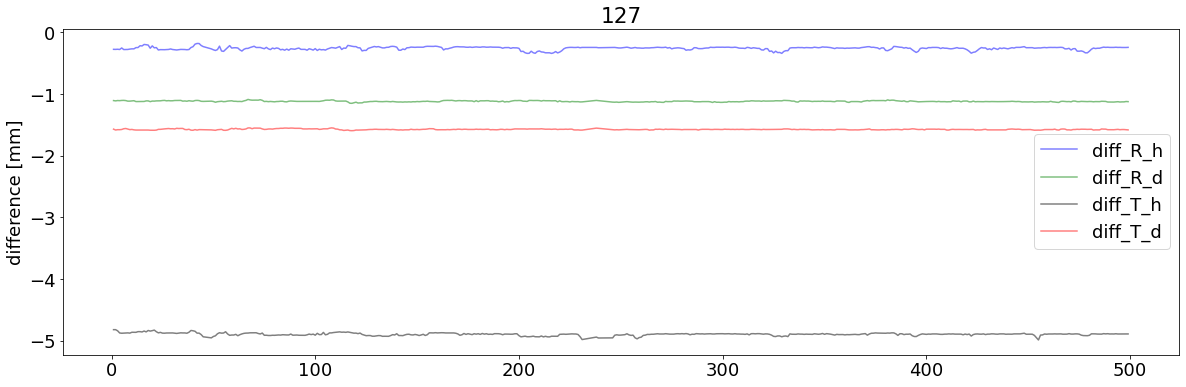

In [164]:
df3["diff_R_h"].plot(style="b-", label = 'diff_R_h', alpha=0.5, figsize=(20,6))
df3["diff_R_d"].plot(style="g-", label = 'diff_R_d', alpha=0.5)
df3["diff_T_h"].plot(style="k-", label = 'diff_T_h', alpha=0.5)
df3["diff_T_d"].plot(style="r-", label = 'diff_T_d', alpha=0.5)

ylim = 1
plt.title(file_name)
plt.legend()
plt.ylabel("difference [mm]")
#plt.ylim(-ylim, ylim)

In [165]:
df4 = df3[["R_h", "R_d", "T_h", "T_d", "Guide", "RoadL", "RoadR", "theta", 
           "R_h'", "R_d'", "T_h'", "T_d'", "R_h_man", "R_d_man", "T_h_man", "T_d_man", 
           "diff_R_h", "diff_R_d", "diff_T_h", "diff_T_d"]]
df4

,R_h,R_d,T_h,T_d,Guide,RoadL,RoadR,theta,R_h',R_d',T_h',T_d',R_h_man,R_d_man,T_h_man,T_d_man,diff_R_h,diff_R_d,diff_T_h,diff_T_d
1,1.443,1.839,-1.098,0.209,0.687,0.450,-0.468,5.400e-04,0.723,0.893,-1.818,-0.570,1,2,3,1,-0.277,-1.107,-4.818,-1.570
2,1.443,1.838,-1.097,0.198,0.690,0.450,-0.471,5.418e-04,0.722,0.888,-1.818,-0.584,1,2,3,1,-0.278,-1.112,-4.818,-1.584
3,1.453,1.839,-1.108,0.198,0.684,0.456,-0.471,5.453e-04,0.724,0.893,-1.837,-0.579,1,2,3,1,-0.276,-1.107,-4.837,-1.579
4,1.453,1.838,-1.139,0.198,0.684,0.459,-0.471,5.471e-04,0.720,0.891,-1.872,-0.579,1,2,3,1,-0.280,-1.109,-4.872,-1.579
5,1.473,1.837,-1.148,0.198,0.681,0.456,-0.468,5.435e-04,0.745,0.895,-1.876,-0.575,1,2,3,1,-0.255,-1.105,-4.876,-1.575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1.544,1.818,-1.099,0.189,0.669,0.498,-0.492,5.824e-04,0.755,0.869,-1.888,-0.579,1,2,3,1,-0.245,-1.131,-4.888,-1.579
496,1.543,1.818,-1.098,0.189,0.666,0.498,-0.495,5.841e-04,0.753,0.872,-1.888,-0.576,1,2,3,1,-0.247,-1.128,-4.888,-1.576
497,1.543,1.818,-1.098,0.189,0.666,0.498,-0.495,5.841e-04,0.753,0.872,-1.888,-0.576,1,2,3,1,-0.247,-1.128,-4.888,-1.576
498,1.543,1.827,-1.097,0.189,0.669,0.498,-0.495,5.841e-04,0.753,0.878,-1.887,-0.579,1,2,3,1,-0.247,-1.122,-4.887,-1.579


In [166]:
df4.describe()

,R_h,R_d,T_h,T_d,Guide,RoadL,RoadR,theta,R_h',R_d',T_h',T_d',R_h_man,R_d_man,T_h_man,T_d_man,diff_R_h,diff_R_d,diff_T_h,diff_T_d
count,483.000,483.000,483.000,483.000,483.000,483.000,483.000,4.830e+02,483.000,483.000,483.000,483.000,483.0,483.0,483.0,483.0,483.000,483.000,483.000,483.000
mean,1.517,1.835,-1.114,0.202,0.679,0.491,-0.485,5.739e-04,0.739,0.880,-1.892,-0.574,1.0,2.0,3.0,1.0,-0.261,-1.120,-4.892,-1.574
std,0.033,0.008,0.021,0.010,0.010,0.014,0.010,1.311e-05,0.026,0.009,0.021,0.008,0.0,0.0,0.0,0.0,0.026,0.009,0.021,0.008
min,1.442,1.817,-1.188,0.188,0.663,0.450,-0.498,5.365e-04,0.657,0.848,-1.985,-0.595,1.0,2.0,3.0,1.0,-0.343,-1.152,-4.985,-1.595
25%,1.493,1.827,-1.137,0.198,0.672,0.489,-0.492,5.700e-04,0.727,0.875,-1.901,-0.580,1.0,2.0,3.0,1.0,-0.273,-1.125,-4.901,-1.580
50%,1.533,1.838,-1.098,0.198,0.675,0.495,-0.489,5.788e-04,0.745,0.879,-1.890,-0.575,1.0,2.0,3.0,1.0,-0.255,-1.121,-4.890,-1.575
75%,1.543,1.839,-1.098,0.209,0.684,0.499,-0.480,5.824e-04,0.754,0.887,-1.883,-0.571,1.0,2.0,3.0,1.0,-0.246,-1.113,-4.883,-1.571
max,1.544,1.858,-1.097,0.229,0.705,0.513,-0.459,5.894e-04,0.818,0.912,-1.818,-0.549,1.0,2.0,3.0,1.0,-0.182,-1.088,-4.818,-1.549


結果のCSV出力

In [167]:
df3.to_csv(csv_path + "_result.csv", index=False)

<AxesSubplot:>

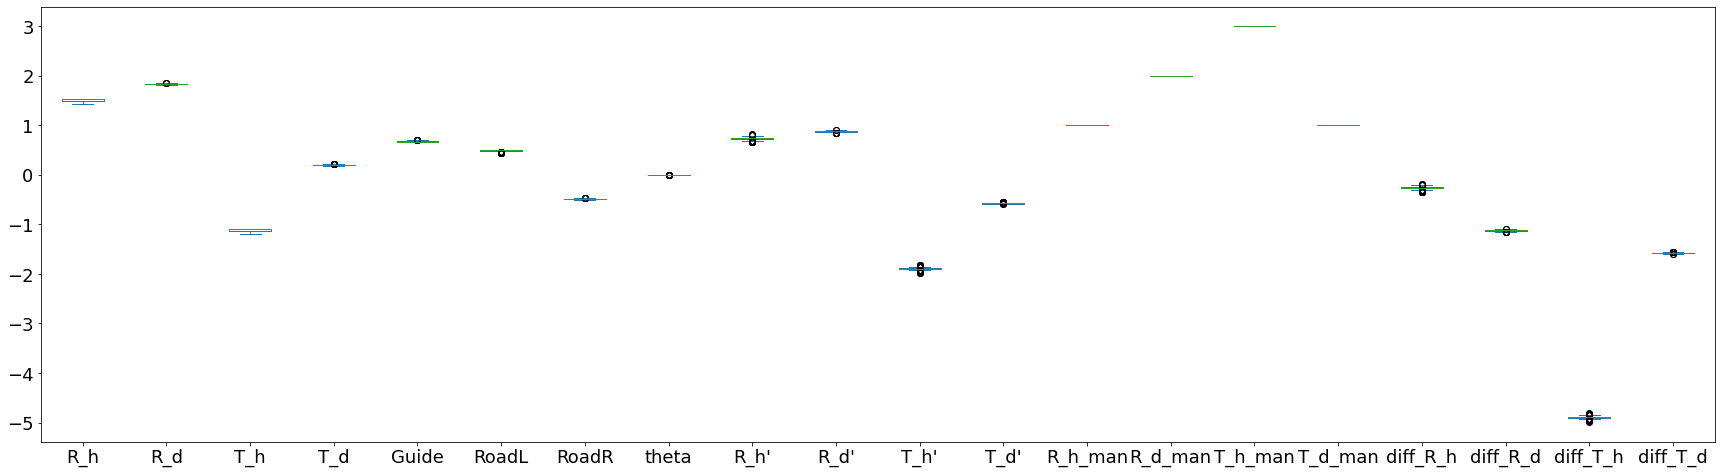

In [168]:
df4.plot.box(figsize=(30,8))
#plt.ylim(-0.1, 0.1)